In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

plt.rcParams.update({'font.size': 12})

In [164]:
def estimate_transmissivity_1D_model(num_samples, lam=0.5):

    pobegli = 0.
    n_sipanj = np.zeros(num_samples)
    pot = np.zeros(num_samples)
    
    for i in range(num_samples):

        x = np.random.exponential(lam)
        m = 0 # st sipanj

        while x < 1. and x > 0.:
            dx = np.random.choice([-1., 1.]) + np.random.exponential(lam)
            x += dx
            m += 1

        if x >= 1.:
            pobegli += 1

        n_sipanj[i] = m

    T = pobegli/num_samples
    T_err = 1. / float(num_samples)**(3./2.) * np.sqrt(float(num_samples)*float(pobegli) - float(pobegli)**2)

    return T, T_err, n_sipanj


def estimate_transmissivity_2D_model(num_samples, lam=0.5):

    pobegli = 0.
    n_sipanj = np.zeros(num_samples)
    
    for i in range(num_samples):

        x = np.random.exponential(lam)
        y = 0.
        m = 0 # st sipanj

        while x < 1. and x > 0.:
            x += np.random.exponential(lam) * np.cos(2*np.pi*np.random.rand())
            y += np.random.exponential(lam) * np.sin(2*np.pi*np.random.rand())
            m += 1

        if x >= 1.:
            pobegli += 1
        
        n_sipanj[i] = m

    T = pobegli/num_samples
    T_err = 1. / float(num_samples)**(3./2.) * np.sqrt(float(num_samples)*float(pobegli) - float(pobegli)**2)

    return T, T_err, n_sipanj


def estimate_transmissivity_3D_model(num_samples, lam=0.5):

    pobegli = 0.
    n_sipanj = np.zeros(num_samples)
    
    for i in range(num_samples):

        x = np.random.exponential(lam)
        y = 0.
        z = 0.
        m = 0 # st sipanj

        while x < 1. and x > 0.:
            x += np.random.exponential(lam) * np.cos(2*np.pi*np.random.rand()) * np.sin(np.pi*np.random.rand())
            y += np.random.exponential(lam) * np.sin(2*np.pi*np.random.rand()) * np.sin(np.pi*np.random.rand())
            z += np.random.exponential(lam) * np.cos(np.pi*np.random.rand())
            m += 1

        if x >= 1.:
            pobegli += 1
        
        n_sipanj[i] = m

    T = pobegli/num_samples
    T_err = 1. / float(num_samples)**(3./2.) * np.sqrt(float(num_samples)*float(pobegli) - float(pobegli)**2)

    return T, T_err, n_sipanj

In [189]:
num_samples = np.logspace(3, 7, dtype=int)


In [ ]:

Ts1D = np.zeros_like(num_samples, dtype=float)
Ts1D_err = np.zeros_like(num_samples, dtype=float)
Ts2D = np.zeros_like(num_samples, dtype=float)
Ts2D_err = np.zeros_like(num_samples, dtype=float)
Ts3D = np.zeros_like(num_samples, dtype=float)
Ts3D_err = np.zeros_like(num_samples, dtype=float)

for i, num in enumerate(num_samples):
    print(i/len(num_samples))
    Ts1D[i], Ts1D_err[i], n = estimate_transmissivity_1D_model(num)
    Ts2D[i], Ts2D_err[i], n = estimate_transmissivity_2D_model(num)
    Ts3D[i], Ts3D_err[i], n = estimate_transmissivity_3D_model(num)

ValueError: 'x' and 'y' must have the same size

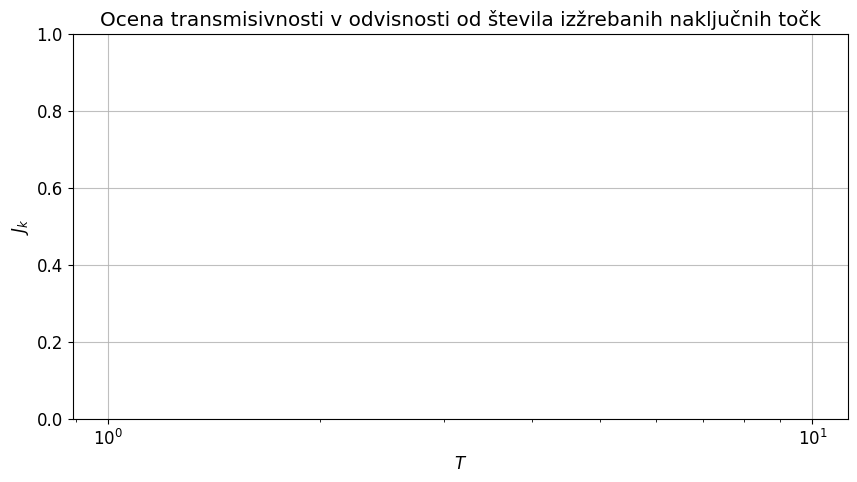

In [190]:
# Transmisivnost

fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(1, 1, 1)
ax.grid(alpha=0.8)
ax.set_xscale('log')
ax.set_title('Ocena transmisivnosti v odvisnosti od števila izžrebanih naključnih točk')
ax.set_xlabel(r'$T$')
ax.set_ylabel(r'$J_k$')
ax.errorbar(num_samples, Ts1D, yerr=Ts1D_err, capsize=3, marker='.', markersize=7, barsabove=True, ecolor='black', color='red', label=r'1D model')
ax.errorbar(num_samples, Ts2D, yerr=Ts2D_err, capsize=3, marker='.', markersize=7, barsabove=True, ecolor='black', color='green', label=r'2D model')
ax.errorbar(num_samples, Ts3D, yerr=Ts3D_err, capsize=3, marker='.', markersize=7, barsabove=True, ecolor='black', color='blue', label=r'3D model')
ax.legend()

print(Ts1D[-1], Ts1D_err[-1])
print(Ts2D[-1], Ts2D_err[-1])
print(Ts3D[-1], Ts3D_err[-1])

In [173]:
num = int(10**7)

Ts1D, Ts1D_err, n1D = estimate_transmissivity_1D_model(num)
Ts2D, Ts2D_err, n2D = estimate_transmissivity_2D_model(num)
Ts3D, Ts3D_err, n3D = estimate_transmissivity_3D_model(num)

Text(0.5, 1.0, 'Porazdelitev nevtronov po številu sipanj')

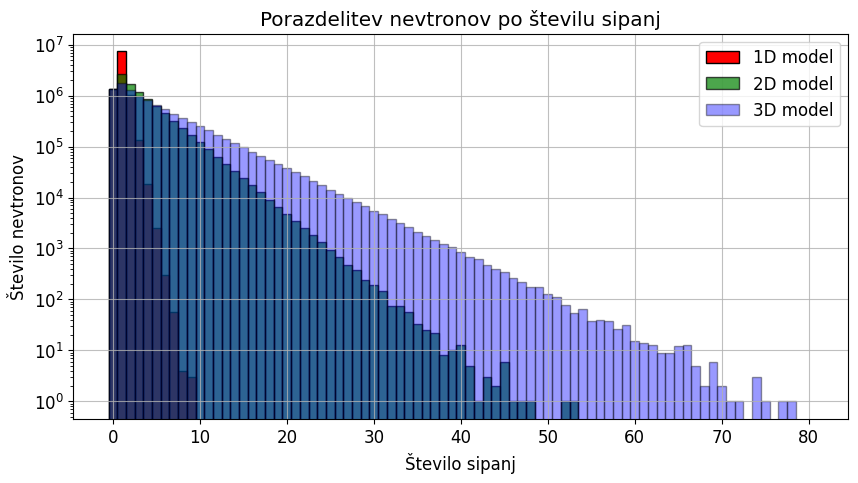

In [183]:
# Create a histogram with bins for each natural number
bins = np.arange(-0.5, np.max(n3D), 1)  # Adjust the range based on the natural numbers in your array
fig = plt.figure(figsize=(10, 5))

ax = plt.subplot(111)
ax.set_yscale('log')
ax.grid(alpha=0.8)
ax.hist(n1D, bins=bins, color='red', edgecolor='black', alpha=1, label='1D model')
ax.hist(n2D, bins=bins, color='green', edgecolor='black', alpha=0.7, label='2D model')
ax.hist(n3D, bins=bins, color='blue', edgecolor='black', alpha=0.4, label='3D model')

# Add labels and title
ax.legend()
ax.set_xlabel('Število sipanj')
ax.set_ylabel('Število nevtronov')
ax.set_title('Porazdelitev nevtronov po številu sipanj')

In [185]:
print(np.average(n1D))
print(np.average(n2D))
print(np.average(n3D))

0.9999425
3.018829
4.7405477


In [211]:
num = int(10**5)

lams=np.logspace(-1, 0.7, 10)

Ts1D_lam = np.zeros_like(lams, dtype=float)
Ts1D_lam_err = np.zeros_like(lams, dtype=float)
n1D_avg = np.zeros_like(lams, dtype=float)
Ts2D_lam = np.zeros_like(lams, dtype=float)
Ts2D_lam_err = np.zeros_like(lams, dtype=float)
n2D_avg = np.zeros_like(lams, dtype=float)
Ts3D_lam = np.zeros_like(lams, dtype=float)
Ts3D_lam_err = np.zeros_like(lams, dtype=float)
n3D_avg = np.zeros_like(lams, dtype=float)

for i, lam in enumerate(lams):
    print(i/len(lams))
    
    a = estimate_transmissivity_1D_model(num, lam=lam)
    Ts1D_lam[i] = a[0]
    Ts1D_lam_err[i] = a[1]
    n1D_avg[i] = np.average(a[2])

    b =  estimate_transmissivity_2D_model(num, lam=lam)
    Ts2D_lam[i] = b[0]
    Ts2D_lam_err[i] = b[1]
    n2D_avg[i] = np.average(b[2])

    c = estimate_transmissivity_3D_model(num, lam=lam)
    Ts3D_lam[i] = c[0]
    Ts3D_lam_err[i] = c[1]
    n3D_avg[i] = np.average(c[2])

0.0
0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9


In [200]:
print(n3D_avg)

[4.7719 4.7463 4.6946 4.7062 4.8109 4.7793 4.641  4.6723]


[]

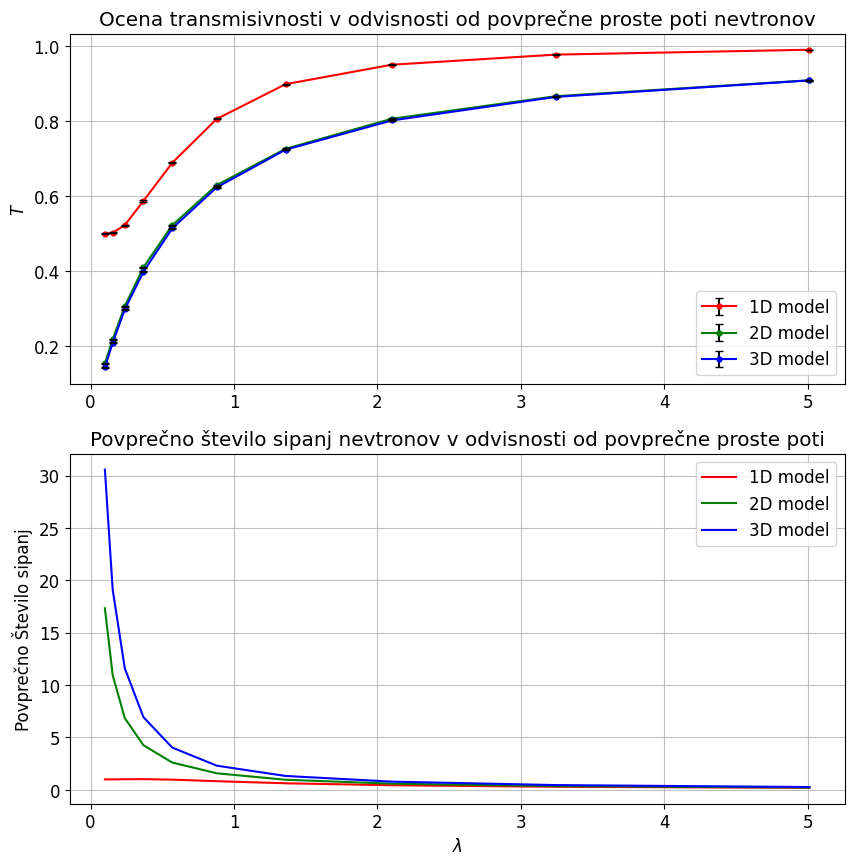

In [214]:
# Transmisivnost

fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(2, 1, 1)
ax1.grid(alpha=0.8)
ax1.set_title('Ocena transmisivnosti v odvisnosti od povprečne proste poti nevtronov')
ax1.set_ylabel(r'$T$')
ax1.errorbar(lams, Ts1D_lam, yerr=Ts1D_lam_err, capsize=3, marker='.', markersize=7, barsabove=True, ecolor='black', color='red', label=r'1D model')
ax1.errorbar(lams, Ts2D_lam, yerr=Ts2D_lam_err, capsize=3, marker='.', markersize=7, barsabove=True, ecolor='black', color='green', label=r'2D model')
ax1.errorbar(lams, Ts3D_lam, yerr=Ts3D_lam_err, capsize=3, marker='.', markersize=7, barsabove=True, ecolor='black', color='blue', label=r'3D model')
ax1.legend()

ax2 = fig.add_subplot(2, 1, 2)
ax2.grid(alpha=0.8)
ax2.set_title('Povprečno število sipanj nevtronov v odvisnosti od povprečne proste poti')
ax2.set_xlabel(r'$\lambda$')
ax2.set_ylabel(r'Povprečno Število sipanj')
ax2.errorbar(lams, n1D_avg, color='red', label=r'1D model')
ax2.errorbar(lams, n2D_avg, color='green', label=r'2D model')
ax2.errorbar(lams, n3D_avg, color='blue', label=r'3D model')
ax2.legend()
ax2.plot()